In [1]:
import os
from pandas import read_csv
import pandas as pd
import geopandas as gps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.chdir('/Users/xiaodanxu/Documents/SynthFirm.nosync')


plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

In [2]:
# load network data

path_to_file = 'RawData/FAF5_Highway_Assignment_Results'

net_geometry_file = \
'FAF5_links.geojson'

network_gdf = gps.read_file(os.path.join(path_to_file, net_geometry_file))
print(len(network_gdf))


487394


In [7]:
# load truck flow -- domestic only

truck_assignment_file = \
'FAF5_2017_Highway_Assignment_Results/CSV Format/FAF5 Domestic Truck Flows by Commodity_2017.csv'

truck_flow_df = read_csv(os.path.join(path_to_file, truck_assignment_file))
print(len(truck_flow_df))

306193


In [9]:
truck_flow_df.head(5)
truck_flow_df_sel = truck_flow_df[['ID', 'TOT Tons_17 Dom',	'TOT Trips_17 Dom']]
print(truck_flow_df_sel[['TOT Tons_17 Dom',	'TOT Trips_17 Dom']].sum())

TOT Tons_17 Dom     1.255347e+09
TOT Trips_17 Dom    1.598368e+08
dtype: float64


In [11]:
# print(network_gdf.columns)
network_gdf_sel = network_gdf[['OBJECTID', 'ID', 'LENGTH', 
                               'Country', 'STATE', 'STFIPS', 
                               'County_Name', 'CTFIPS',
                               'Urban_Code', 'FAFZONE', 'F_Class', 'geometry']]
network_gdf_sel = network_gdf_sel.merge(truck_flow_df_sel, on = 'ID',
                                       how = 'left')
print(network_gdf_sel[['TOT Tons_17 Dom',	'TOT Trips_17 Dom']].sum())
network_gdf_sel.head(5)

TOT Tons_17 Dom     1.255347e+09
TOT Trips_17 Dom    1.598368e+08
dtype: float64


,OBJECTID,ID,LENGTH,Country,STATE,STFIPS,County_Name,CTFIPS,Urban_Code,FAFZONE,F_Class,geometry,TOT Tons_17 Dom,TOT Trips_17 Dom
0,1,1,0.054083,USA,AK,02,PETERSBURG,02195,99999,20.0,5.0,"MULTILINESTRING ((-132.97501 56.80636, -132.97...",214.994,32.8449
1,2,2,0.114854,USA,AK,02,PETERSBURG,02195,99999,20.0,5.0,"MULTILINESTRING ((-132.97503 56.80701, -132.97...",532.429,65.6089
2,3,3,0.032432,USA,AK,02,PETERSBURG,02195,99999,20.0,5.0,"MULTILINESTRING ((-132.97503 56.80701, -132.97...",317.435,32.7640
3,4,4,0.626287,USA,AK,02,PETERSBURG,02195,99999,20.0,4.0,"MULTILINESTRING ((-132.97455 56.80664, -132.97...",532.429,65.6089
4,5,5,15.223004,USA,AK,02,PETERSBURG,02195,99999,20.0,NaN,"MULTILINESTRING ((-132.97615 56.80849, -132.97...",1200.000,152.9500


In [17]:
network_gdf_sel.loc[:, 'VMT'] = network_gdf_sel.loc[:, 'TOT Trips_17 Dom'] *\
network_gdf_sel.loc[:, 'LENGTH']
# daily
network_gdf_sel.loc[:, 'TMILES'] = network_gdf_sel.loc[:, 'VMT'] *\
network_gdf_sel.loc[:, 'TOT Tons_17 Dom'] * 1000/365
#daily
print(network_gdf_sel.loc[:, 'VMT'].sum())
print(network_gdf_sel.loc[:, 'TMILES'].sum())

224108218.545244
7921650560184.496


12951155.64592167


<Axes: >

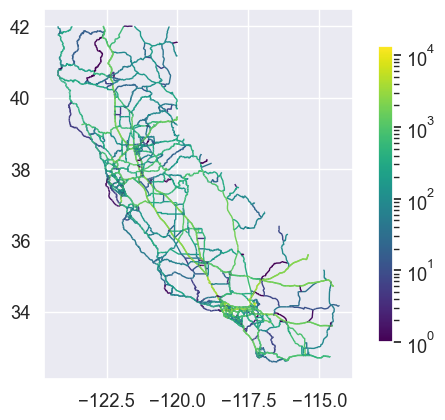

In [18]:
import matplotlib
network_gdf_to_plot = network_gdf_sel.loc[network_gdf_sel['STATE'] == 'CA']
print(network_gdf_to_plot.loc[:, 'VMT'].sum())
network_gdf_to_plot.plot(column = 'TOT Trips_17 Dom', cmap='viridis',
                        legend=True, linewidth=1,
                         norm=matplotlib.colors.LogNorm(vmin=1, 
                                                        vmax = network_gdf_to_plot['TOT Trips_17 Dom'].max()),
                               legend_kwds = {'shrink': 0.8})

In [20]:
vmt_df = pd.DataFrame(network_gdf_sel.drop(columns='geometry'))
vmt_df.to_csv(os.path.join('Validation', 'FAF_domestic_VMT_2017.csv'),
             index = False)


In [3]:
# load truck by truck type

CT_assignment_file = \
'FAF5_2017_Highway_Assignment_Results/CSV Format/FAF5 Total CU Truck Flows by Commodity_2017.csv'

CT_truck_flow_df = read_csv(os.path.join(path_to_file, CT_assignment_file))
print(len(CT_truck_flow_df))

SUT_assignment_file = \
'FAF5_2017_Highway_Assignment_Results/CSV Format/FAF5 Total SU Truck Flows by Commodity_2017.csv'

SUT_truck_flow_df = read_csv(os.path.join(path_to_file, SUT_assignment_file))
print(len(SUT_truck_flow_df))
SUT_truck_flow_df.head(5)

315868
316065


,ID,AB Tons_17 SU,BA Tons_17 SU,AB Trips_17 SU,BA Trips_17 SU,TOT Tons_17 SU,TOT Trips_17 SU,AB Farm Products-Tons_17 SU,BA Farm Products-Tons_17 SU,AB Farm Products-Trips_17 SU,...,AB Motor and Other Veh-Trips_17 SU,BA Motor and Other Veh-Trips_17 SU,TOT Motor and Other Veh-Tons_17 SU,TOT Motor and Other Veh-Trips_17 SU,AB Mixed Freight-Tons_17 SU,BA Mixed Freight-Tons_17 SU,AB Mixed Freight-Trips_17 SU,BA Mixed Freight-Trips_17 SU,TOT Mixed Freight-Tons_17 SU,TOT Mixed Freight-Trips_17 SU
0,1,166.094,0.000,28.1386,0.0000,166.094,28.1386,62.44840,0.00000,10.704800,...,0.000043,0.000000,0.000226,0.000043,30.58070,0.000000,8.23937,0.000000,30.58070,8.23937
1,2,166.094,234.947,28.1386,24.6025,401.041,52.7411,62.44840,2.39088,10.704800,...,0.000043,0.100107,0.521690,0.100150,30.58070,6.038160,8.23937,1.630090,36.61880,9.86946
2,3,234.947,0.000,24.6025,0.0000,234.947,24.6025,2.39088,0.00000,0.398688,...,0.100107,0.000000,0.521464,0.100107,6.03816,0.000000,1.63009,0.000000,6.03816,1.63009
3,4,234.947,166.094,24.6025,28.1386,401.041,52.7411,2.39088,62.44840,0.398688,...,0.100107,0.000043,0.521690,0.100150,6.03816,30.580700,1.63009,8.239370,36.61880,9.86946
4,5,484.655,345.330,70.4252,47.5333,829.986,117.9590,149.03700,114.52800,25.552000,...,0.300946,0.000332,1.569380,0.301278,32.84820,0.199582,8.85997,0.053644,33.04770,8.91361


In [6]:
# calculate VMT BY TYPE

CT_truck_flow_df_sel = CT_truck_flow_df[['ID', 'TOT Tons_17 CU', 'TOT Trips_17 CU']]
print(CT_truck_flow_df_sel[['TOT Tons_17 CU',	'TOT Trips_17 CU']].sum())
SUT_truck_flow_df_sel = SUT_truck_flow_df[['ID', 'TOT Tons_17 SU', 'TOT Trips_17 SU']]
print(SUT_truck_flow_df_sel[['TOT Tons_17 SU',	'TOT Trips_17 SU']].sum())

network_gdf_sel = network_gdf[['OBJECTID', 'ID', 'LENGTH', 
                               'Country', 'STATE', 'STFIPS', 
                               'County_Name', 'CTFIPS',
                               'Urban_Code', 'FAFZONE', 'F_Class', 'geometry']]

CT_network_gdf_sel = network_gdf_sel.merge(CT_truck_flow_df_sel, on = 'ID',
                                       how = 'left')
CT_network_gdf_sel.loc[:, 'VMT'] = CT_network_gdf_sel.loc[:, 'TOT Trips_17 CU'] *\
CT_network_gdf_sel.loc[:, 'LENGTH']
print(CT_network_gdf_sel.loc[:, 'VMT'].sum())

SUT_network_gdf_sel = network_gdf_sel.merge(SUT_truck_flow_df_sel, on = 'ID',
                                       how = 'left')
SUT_network_gdf_sel.loc[:, 'VMT'] = SUT_network_gdf_sel.loc[:, 'TOT Trips_17 SU'] *\
SUT_network_gdf_sel.loc[:, 'LENGTH']
print(SUT_network_gdf_sel.loc[:, 'VMT'].sum())

TOT Tons_17 CU     1.059355e+09
TOT Trips_17 CU    1.202559e+08
dtype: float64
TOT Tons_17 SU     4.570872e+08
TOT Trips_17 SU    7.226186e+07
dtype: float64
173944433.0512303
90681545.69587746
